# Problem Statement 
The problem is preety much stright forward, we all are famelier with Garbage and waste material which is very harmful for our society.if we talk about amount of waste then the world almost generates at least 5 million tons of waste per day and this number is still increasing day by day that's why we need to aware about waste. This model which help us to classify waste with 7 different waste materials and it will show you the details of that particular waste materials. This will help to raise awareness for people to reduce and recycle waste.
## Overview
- There are <b>'cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash'</b> total 7 different types of waste materials which are use for recycling.
- Here i have 7600+ images belonging 7 classes.
- Here i have trained dataset using VGG16,RESNET50 model via using Transfer Learning technique of CNN for classification.
- Here i have trained this model till 5 epochs and i got 69.77% accuracy. Since my computer can not aford more epochs at this time due unavailbility of GPU. if you have good ammount of gpu you can train more than 50 epochs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
import cv2
import sklearn 
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2025-04-17 17:43:59.410109: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
curr_path = '../Datasets/train'

In [3]:
# curr_path = os.getcwd()
# curr_path

In [4]:
# Show the data classes
classes = os.listdir(curr_path)
classes

['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']

# Datasets Understanding

(6100, 224, 224, 3) (6100,)


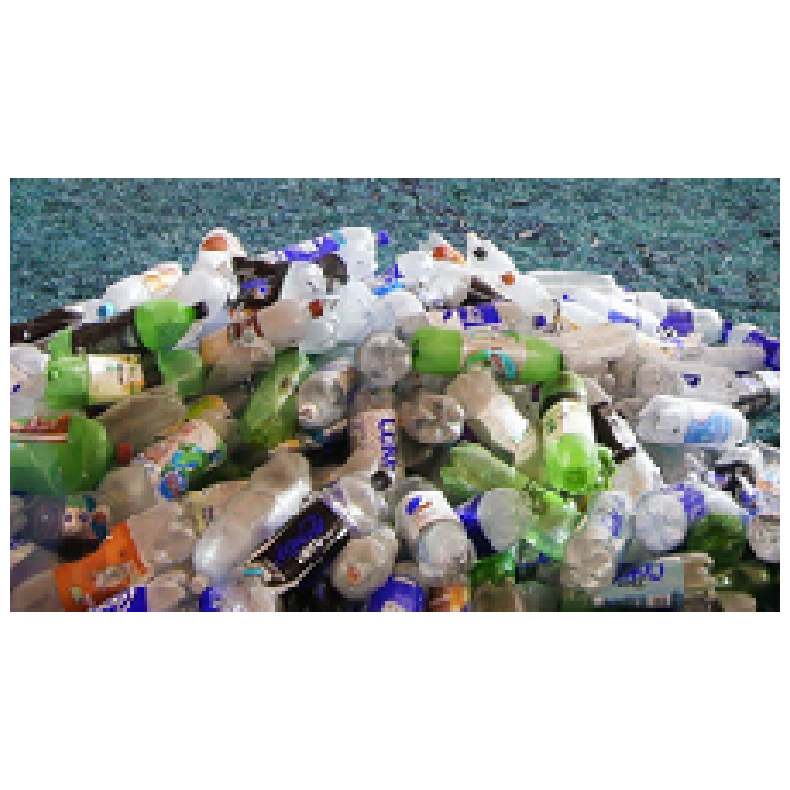

In [5]:
#Loading train datasets
train_data = []
train_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(curr_path):
    dir = curr_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        train_data.append(img)
        train_labels.append(i)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)

In [6]:
curr_test_path = '../Datasets/test'

In [7]:
# curr_test_path = os.getcwd()
# curr_test_path

In [8]:
# Show the data classes
classes = os.listdir(curr_test_path)
classes

['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']

In [9]:
curr_test_path

'../Datasets/test'

In [10]:
#Loading train datasets
test_data = []
test_labels = []
classes = 7 #data belonges to 7 class
for i in os.listdir(curr_test_path):
    dir = curr_test_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(i)


test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape, test_labels.shape)

(1525, 224, 224, 3) (1525,)


In [11]:
curr_path

'../Datasets/train'

In [12]:
# curr_path = os.getcwd()

# Data Augmentation part done on training Dataset

In [13]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(curr_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 6100 images belonging to 7 classes.


In [14]:
# show augmented images
# Function to plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Data Augmentation Visualization

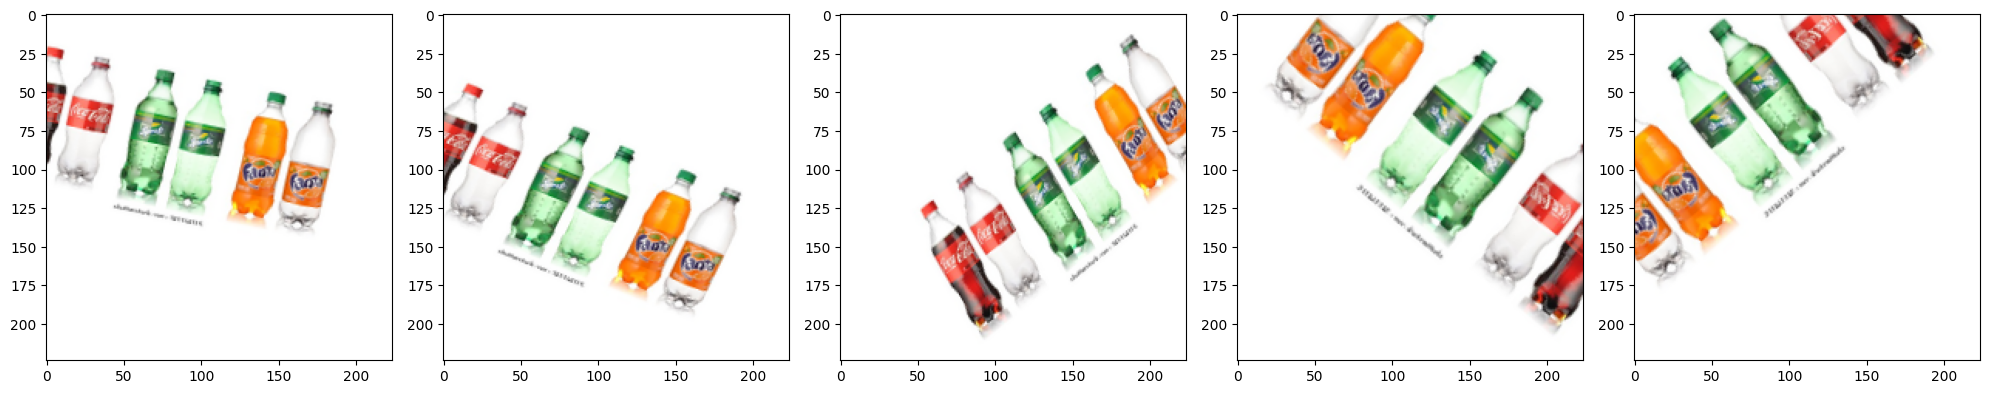

In [15]:
# Get a batch of augmented images using `next()`
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Traingn images')

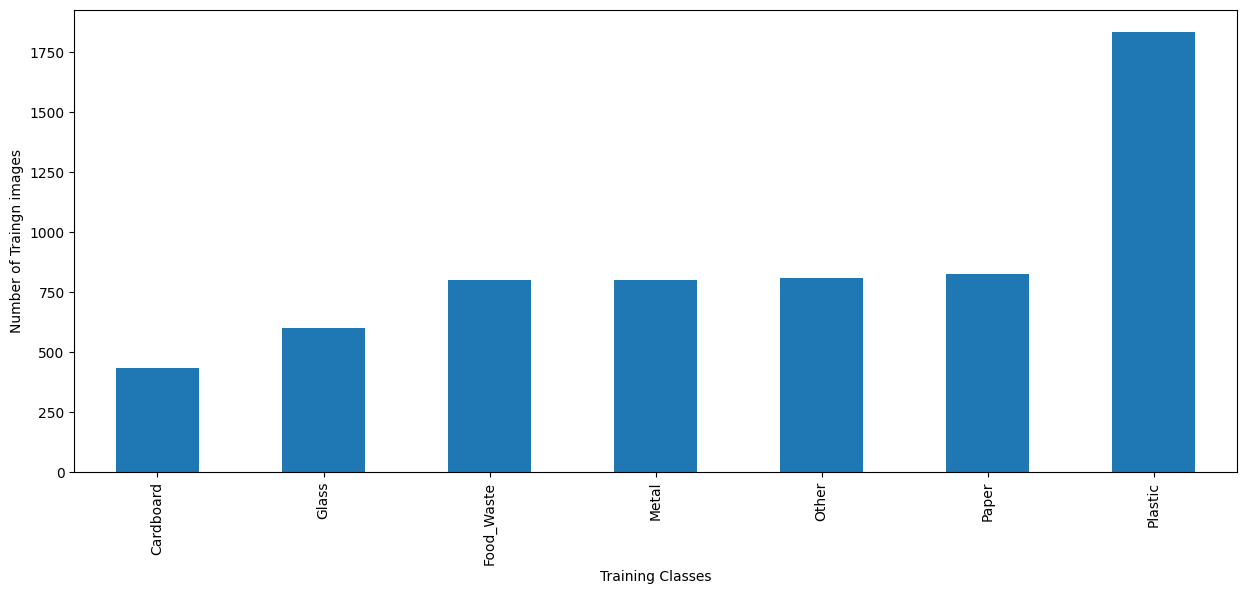

In [16]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path):
    data_dic[folder] = len(os.listdir(curr_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [17]:
curr_test_path

'../Datasets/test'

In [18]:
# curr_test_path = os.getcwd()

In [19]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
testing_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
testing_data = testing_datagen.flow_from_directory(curr_test_path, # this is the target directory means give train directory path
                                      target_size=(224, 224), # all images will be resized to 224x224
                                      batch_size=32,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 1525 images belonging to 7 classes.


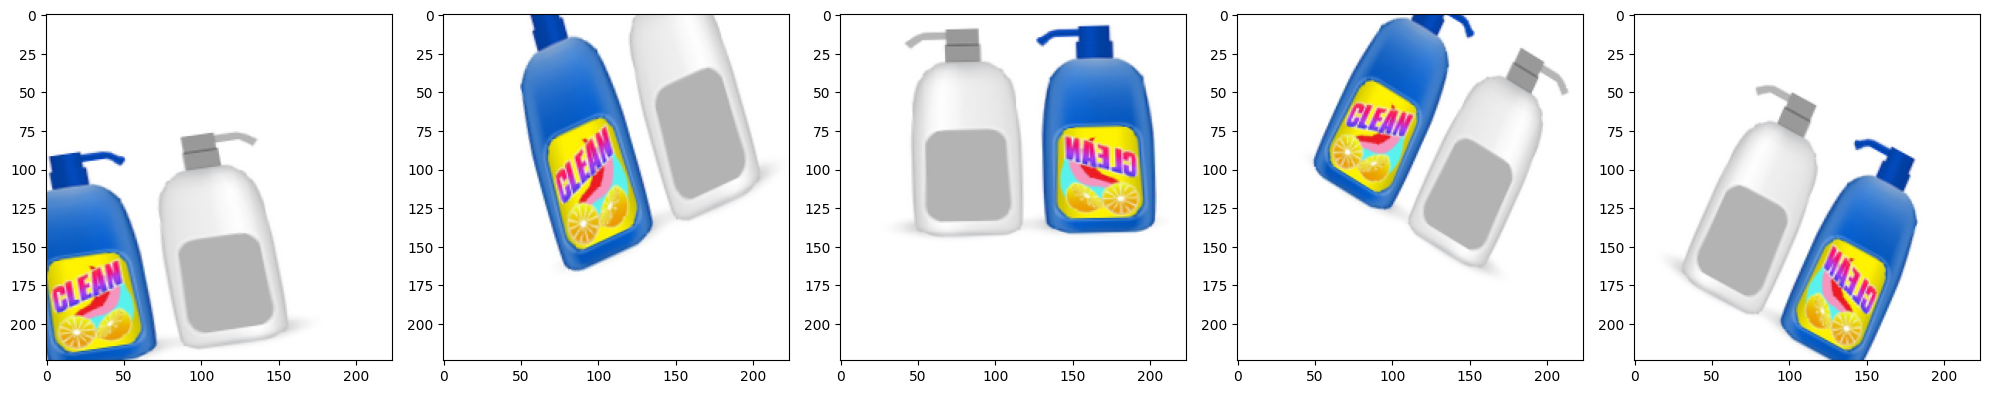

In [20]:
# showing augmented images
images = [testing_data[1][0][0] for i in range(5)]
plotImages(images)

Text(0, 0.5, 'Number of Valedation images')

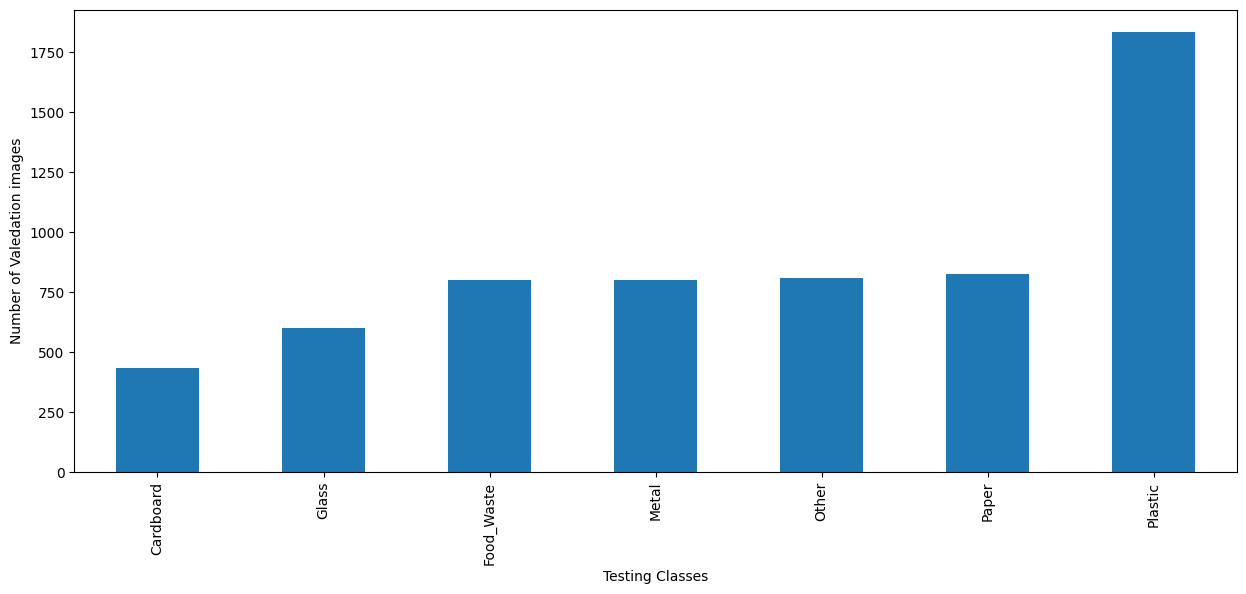

In [21]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path):
    data_dic[folder] = len(os.listdir(curr_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Testing Classes')
plt.ylabel('Number of Valedation images')

# CNN - RESNET50 Architeture using Tranfer Learning

In [22]:
# # Define IMAGE_SIZE
# IMAGE_SIZE = (224, 224)  # ResNet50 generally uses 224x224 images

# # add preprocessing layer to the front of VGG
# RESNET50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

IMAGE_SIZE = (224, 224)

# Correct: use tuple, not list
RESNET50 = ResNet50(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)


In [23]:
# don't train existing weights
for layer in RESNET50.layers:
    layer.trainable = False

In [24]:
folders = os.listdir(curr_path)

In [25]:
# our layers - you can add more if you want
x = Flatten()(RESNET50.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model_RESNET50 = Model(inputs=RESNET50.input, outputs=prediction)
# view the structure of the model
model_RESNET50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,290,183 (92.66 MB)

 Trainable params: 702,471 (2.68 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
# tell the model what cost and optimization method to use
model_RESNET50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [28]:
# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath = 'RESNET50_model_best.keras', 
                               verbose = False, 
                               save_best_only = True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 4,
                           restore_best_weights = True,
                           mode = 'min')

In [29]:
result = model_RESNET50.fit(
    training_data,
    steps_per_epoch=len(training_data),
    epochs=5,
    callbacks=[early_stop, checkpointer],
    validation_data=testing_data,
    validation_steps=len(testing_data)
)

/Users/shashidharpattar/vcs-dev/AIML_Python_Handon/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 446s 2s/step - accuracy: 0.2210 - loss: 5.1526 - val_accuracy: 0.2433 - val_loss: 2.1564
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.2648 - loss: 2.5418 - val_accuracy: 0.2177 - val_loss: 2.8149
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.2843 - loss: 2.4582 - val_accuracy: 0.2216 - val_loss: 2.9747
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.2789 - loss: 2.8227 - val_accuracy: 0.2236 - val_loss: 2.9065
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.2973 - loss: 2.4335 - val_accuracy: 0.2216 - val_loss: 2.7758


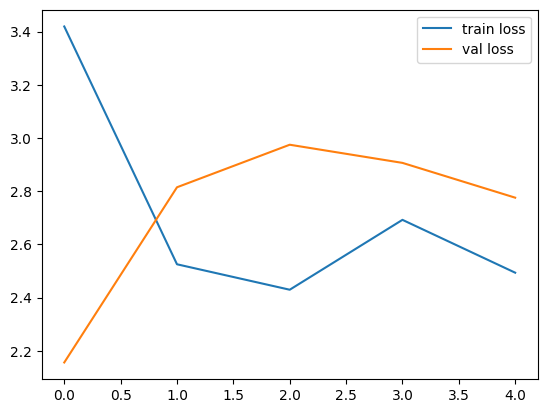

<Figure size 640x480 with 0 Axes>

In [30]:
# loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

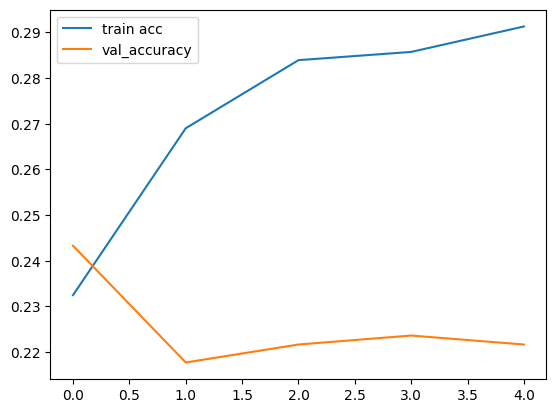

<Figure size 640x480 with 0 Axes>

In [31]:
# accuracies
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Evaluation Matrix

In [32]:
# Score
score = model_RESNET50.evaluate(testing_data, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 2.137920618057251
Test accuracy 0.244590163230896


In [33]:
y_pred = model_RESNET50.predict(testing_data)

48/48 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step


In [34]:
y_pred

array([[0.01115972, 0.20375271, 0.00088831, ..., 0.28824586, 0.26526156,
        0.00941873],
       [0.01021408, 0.60778594, 0.00106864, ..., 0.15158537, 0.02318   ,
        0.00428424],
       [0.09412684, 0.1660757 , 0.01698834, ..., 0.05125676, 0.14718741,
        0.1542596 ],
       ...,
       [0.14133996, 0.17647776, 0.07473565, ..., 0.15044671, 0.05524332,
        0.21159565],
       [0.3577    , 0.06313454, 0.02253108, ..., 0.17197728, 0.09295315,
        0.17014852],
       [0.07864526, 0.21099538, 0.03342465, ..., 0.13861029, 0.09053205,
        0.23565862]], dtype=float32)